### Introduction

This dataset contains 3,200+ images of different gemstones. The images are grouped into 87 classes which are already divided into train and test data. All images are in various sizes and are in .jpeg format.
As for gemstones I tried to include them in various shapes - round, oval, square, rectangle, heart.

This dataset is composed of two folders:

train: 
This file contains 87 subfolders and ~2,800 files in total. Each subfolder contains .jpeg images of different gemstones.

test: This file contains 87 subfolders and ~400 files in total. Each subfolder contains .jpeg images of different gemstones


### Import libraries

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from random import randint

In [45]:
# dataset directory

directory = 'C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/train'
#printing all the gemstone categories present in our dataset
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print("The gemsstones in the dataset are \n")
print(Name)
print("\n The count of the gemstones categories: ",len(Name))

The gemsstones in the dataset are 

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'S

#### Map and display all the categories present in our dataset. There are total 87 different kinds of gemstones.

In [46]:
gems_map = dict(zip(Name, [t for t in range(len(Name))]))
print(gems_map)
r_gems_map=dict(zip([t for t in range(len(Name))],Name)) 
print(r_gems_map)

{'Alexandrite': 0, 'Almandine': 1, 'Amazonite': 2, 'Amber': 3, 'Amethyst': 4, 'Ametrine': 5, 'Andalusite': 6, 'Andradite': 7, 'Aquamarine': 8, 'Aventurine Green': 9, 'Aventurine Yellow': 10, 'Benitoite': 11, 'Beryl Golden': 12, 'Bixbite': 13, 'Bloodstone': 14, 'Blue Lace Agate': 15, 'Carnelian': 16, 'Cats Eye': 17, 'Chalcedony': 18, 'Chalcedony Blue': 19, 'Chrome Diopside': 20, 'Chrysoberyl': 21, 'Chrysocolla': 22, 'Chrysoprase': 23, 'Citrine': 24, 'Coral': 25, 'Danburite': 26, 'Diamond': 27, 'Diaspore': 28, 'Dumortierite': 29, 'Emerald': 30, 'Fluorite': 31, 'Garnet Red': 32, 'Goshenite': 33, 'Grossular': 34, 'Hessonite': 35, 'Hiddenite': 36, 'Iolite': 37, 'Jade': 38, 'Jasper': 39, 'Kunzite': 40, 'Kyanite': 41, 'Labradorite': 42, 'Lapis Lazuli': 43, 'Larimar': 44, 'Malachite': 45, 'Moonstone': 46, 'Morganite': 47, 'Onyx Black': 48, 'Onyx Green': 49, 'Onyx Red': 50, 'Opal': 51, 'Pearl': 52, 'Peridot': 53, 'Prehnite': 54, 'Pyrite': 55, 'Pyrope': 56, 'Quartz Beer': 57, 'Quartz Lemon': 58,

In [47]:
img_w, img_h = 100, 100

#### Create functions to read images and labels of gemstones from the training dataset.

In [48]:
#function which reads images and class names
def read_images():
    Images, Labels = [], []
    for root, dirs, files in os.walk('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/train'):
        f = os.path.basename(root)        
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)                    # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w), int(img_h)))   # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)       # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images,Labels)

In [49]:
#function which converts string labels to numbers
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(Name):    
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels  

In [50]:
# Read the images and labels from the training set

Train_Imgs, Train_Lbls = read_images()
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (2856, 100, 100, 3)
Shape of train labels: (2856,)


### Visualization

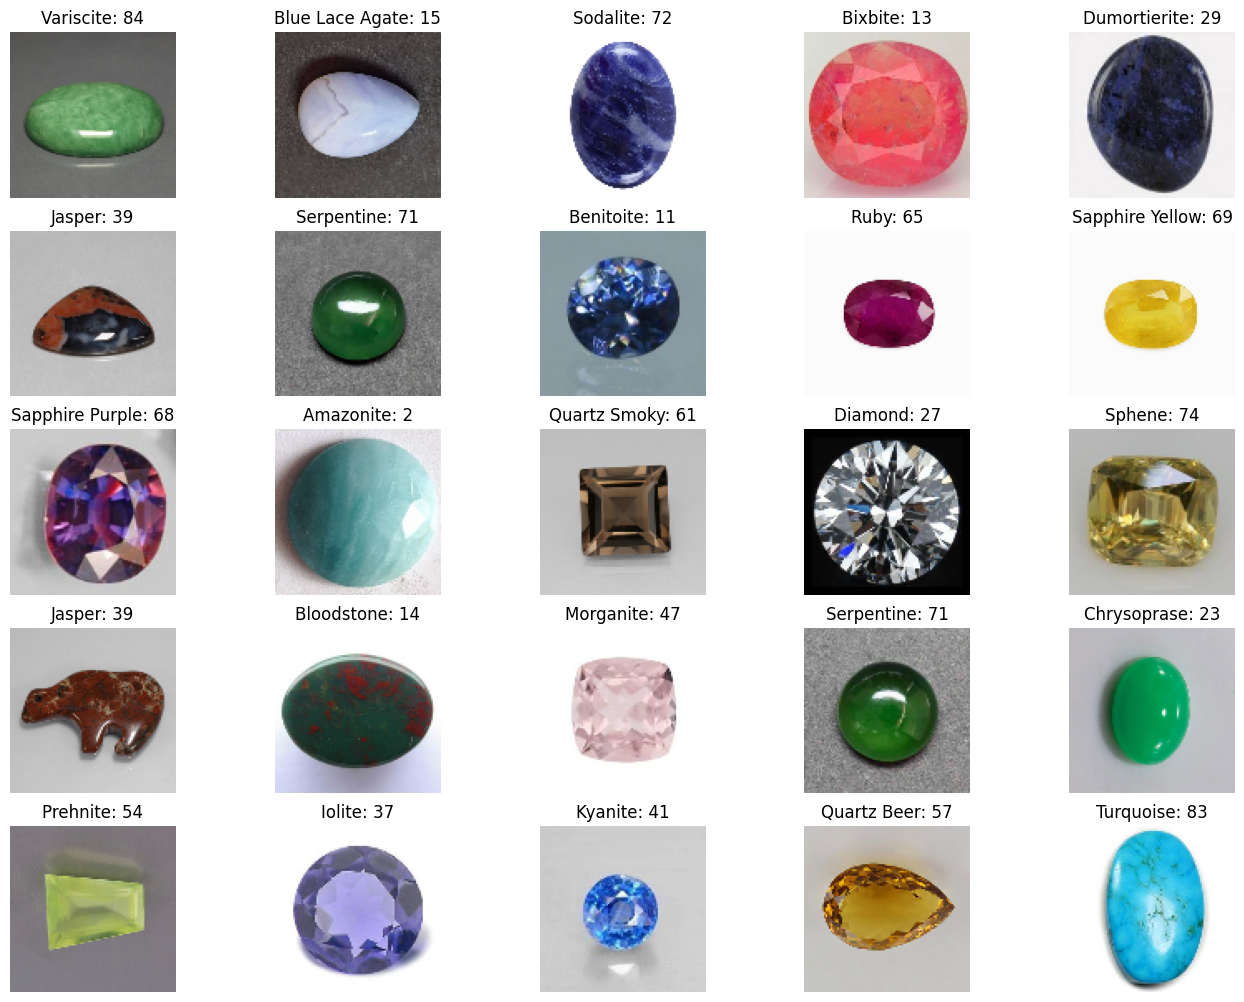

In [51]:
dim = 5

f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(Name[cl]+': ' + str(cl))
        ax[i,j].axis('off')

### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (2284, 100, 100, 3), y_train: (2284,) 
Shape of X_val: (572, 100, 100, 3), y_val: (572,) 


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation,BatchNormalization, AveragePooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

### Model

In [54]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(len(gems_map)))
model.add(Activation('softmax'))

model.summary()

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 87)             │        22,359 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 87)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,103 (805.09 KB)

 Trainable params: 206,103 (805.09 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=180,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

val_datagen = ImageDataGenerator()

This code snippet demonstrates how to use the **`ImageDataGenerator`** class from the **Keras** (or TensorFlow) library to perform **data augmentation** for image datasets. Let's break it down step by step.

### 1. **What is `ImageDataGenerator`?**
- **`ImageDataGenerator`** is a class in **Keras** that allows you to generate batches of tensor image data with real-time data augmentation. This means you can artificially enlarge your training set by transforming the images in various ways (e.g., rotating, flipping, zooming). This technique helps the model generalize better and prevents overfitting by creating more diverse training data.

### 2. **The `train_datagen` Generator**
```python
train_datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    validation_split=0.2
)
```
This line initializes an `ImageDataGenerator` object for the **training data** with the following augmentation options:

#### a. **`vertical_flip=True`**
- This randomly flips some of the images vertically (i.e., upside down).
- **Purpose**: For datasets where vertical symmetry exists (e.g., animals, objects), flipping can add more variety to the dataset.

#### b. **`horizontal_flip=True`**
- This randomly flips some of the images horizontally (left-to-right).
- **Purpose**: This is one of the most common augmentations, especially for objects like animals, vehicles, or faces that can appear symmetrically when flipped horizontally.

#### c. **`rotation_range=40`**
- This randomly rotates some of the images by a maximum of 40 degrees in either direction.
- **Purpose**: Helps the model learn to recognize objects even when they are tilted or rotated, increasing robustness.

#### d. **`width_shift_range=0.2`**
- This shifts the image horizontally by a factor of 0.2 of the image's width.
- **Purpose**: Simulates the scenario where the object is not centered, helping the model learn to recognize off-center objects.

#### e. **`height_shift_range=0.2`**
- This shifts the image vertically by a factor of 0.2 of the image's height.
- **Purpose**: Similar to width shifting, this helps simulate off-center objects and allows the model to become invariant to the position of objects within the image.

#### f. **`zoom_range=0.1`**
- This randomly zooms in or out on some of the images by up to 10%.
- **Purpose**: Teaches the model to handle scale variations by artificially zooming in or out on the image.

#### g. **`validation_split=0.2`**
- This reserves 20% of the images for validation, while the remaining 80% is used for training.
- **Purpose**: Splitting the data ensures the model can be validated on unseen data (held-out validation set), preventing overfitting and providing a better evaluation metric.

### 3. **The `val_datagen` Generator**
```python
val_datagen = ImageDataGenerator()
```
- **`val_datagen`** is an `ImageDataGenerator` object for the **validation data**.
- **No augmentations** are applied here, as you want the validation data to be an accurate representation of the real-world data without any transformations.
- **Purpose**: The validation dataset is used to check the model’s performance on unseen data after each epoch, so no data augmentation is typically applied to avoid any randomness.

### Why Data Augmentation is Useful
- **Data augmentation** artificially increases the size of the training dataset by creating modified versions of the original images.
- It helps the model **generalize better** to unseen data by exposing it to a variety of transformations, such as flipped, rotated, shifted, or zoomed images.
- **Prevents overfitting**: With a larger, more diverse dataset (through augmentation), the model is less likely to memorize the training data and more likely to generalize to new images.

### Example Usage
You would typically use these data generators with a Keras model in the following way:
```python
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # This selects the 80% training subset
)

validation_generator = val_datagen.flow_from_directory(
    train_data_dir,  # Same directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # This selects the 20% validation subset
)

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)
```
- **`flow_from_directory()`**: This method is commonly used to load images from directories and apply the augmentations specified in the `ImageDataGenerator`.
- **Training**: The model is trained using augmented data, while the validation set remains unaugmented for fair evaluation.

In summary, the code snippet uses `ImageDataGenerator` to apply real-time data augmentation to the training dataset while leaving the validation dataset untouched, which helps improve model generalization and performance.

In [35]:
batch_size = 32

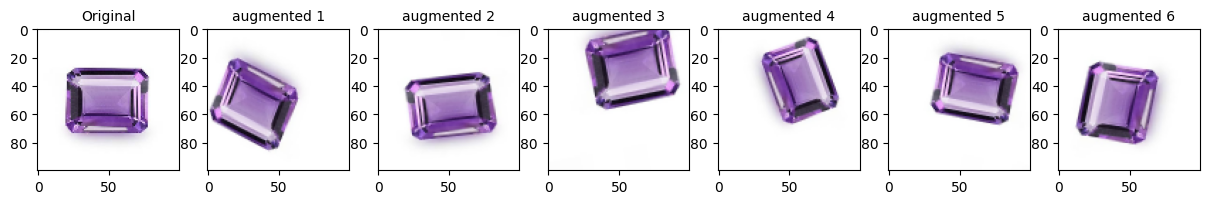

In [61]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = next(it)   # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [62]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [63]:
EPOCHS = 80                           
iter_per_epoch = len(X_train) // batch_size  
val_per_epoch = len(X_val) // batch_size 

In [64]:
m = model.fit(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 
       )

Epoch 1/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.0158 - loss: 5.8701 - val_accuracy: 0.0331 - val_loss: 4.3064
Epoch 2/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0938 - loss: 4.2694 - val_accuracy: 0.0357 - val_loss: 4.3119
Epoch 3/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.0296 - loss: 4.1772 - val_accuracy: 0.0423 - val_loss: 3.6953
Epoch 4/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0625 - loss: 3.7727 - val_accuracy: 0.0714 - val_loss: 3.5731
Epoch 5/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.0809 - loss: 3.6144 - val_accuracy: 0.1213 - val_loss: 3.1992
Epoch 6/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.0938 - loss: 3.1400 - val_accuracy: 0.2500 - val_loss: 3.0171
Epoch 7/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.1475 - loss: 3.0991 - val_accuracy: 0.2132 - val_loss: 2.6950
Epoch 8/80
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 2.8313 - val_accuracy: 0.17

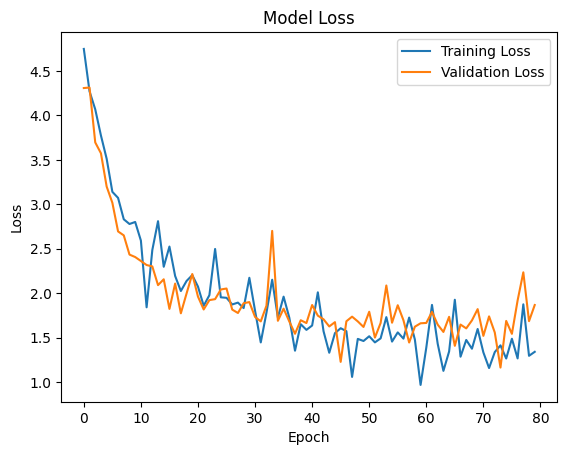

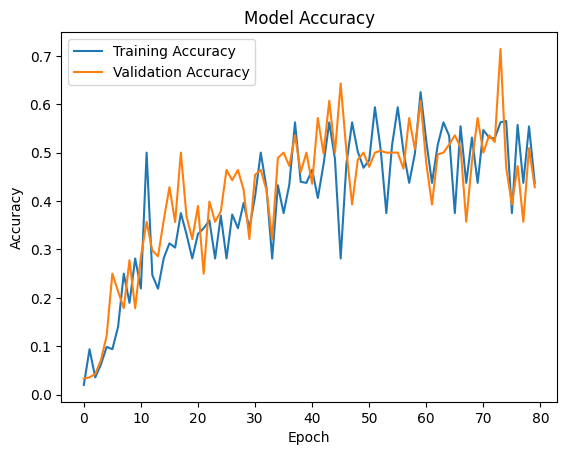

In [77]:
# Plot loss
plt.plot(m.history['loss'], label='Training Loss')  # Add label for training loss
plt.plot(m.history['val_loss'], label='Validation Loss')  # Add label for validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()  # Add the legend to the plot
plt.show()

# Plot accuracy
plt.plot(m.history['accuracy'], label='Training Accuracy')  # Add label for training accuracy
plt.plot(m.history['val_accuracy'], label='Validation Accuracy')  # Add label for validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()  # Add the legend to the plot
plt.show()


### Read the images and label from test dataset

In [67]:
def read_imagest():
    Images, Labels = [], []
    for root, dirs, files in os.walk('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/test'):
        f = os.path.basename(root) 
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w), int(img_h)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images,Labels)

In [68]:
Test_Imgs, Test_Lbls = read_imagest()
Test_Lbls = get_class_index(Test_Lbls)

### Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━

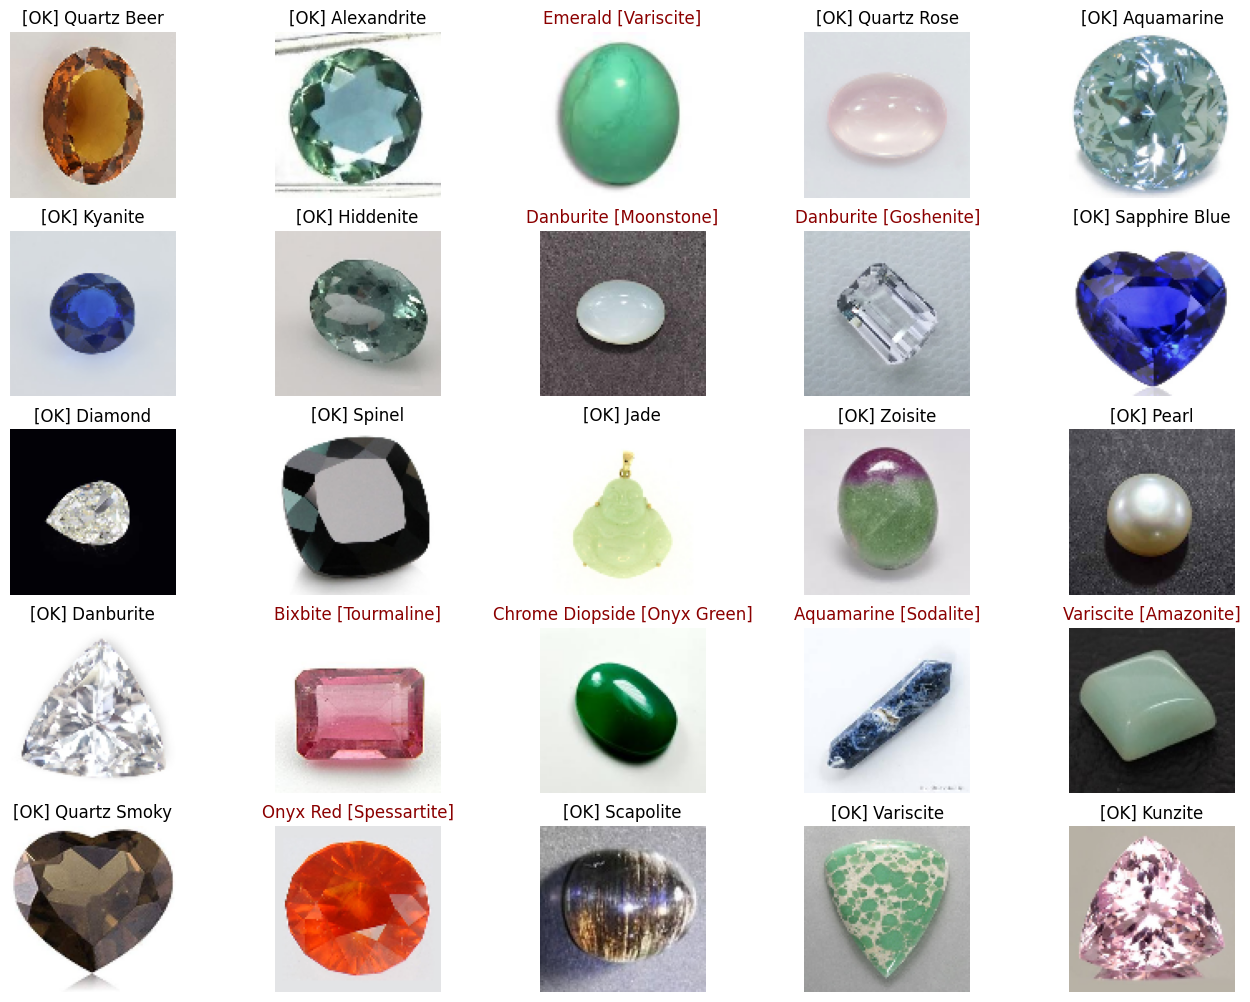

In [69]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Test_Imgs))
        pred_image = np.array([Test_Imgs[rnd_number]])
        pred_class = np.argmax(model.predict(pred_image)[0], axis=-1)
        pred_prob = model.predict(pred_image).reshape(-1)
        act =Name[Test_Lbls[rnd_number]]
        ax[i,j].imshow(Test_Imgs[rnd_number])
        ax[i,j].imshow(pred_image[0])
        if(Name[pred_class] != Name[Test_Lbls[rnd_number]]):
            t = '{} [{}]'.format(Name[pred_class], Name[Test_Lbls[rnd_number]])
            ax[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '[OK] {}'.format(Name[pred_class]) 
            ax[i,j].set_title(t)
        ax[i,j].axis('off')

In [71]:
model.export('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Developing_models_on_own_dataset/GEM_stones_Model')

INFO:tensorflow:Assets written to: C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Developing_models_on_own_dataset/GEM_stones_Model\assets


INFO:tensorflow:Assets written to: C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Developing_models_on_own_dataset/GEM_stones_Model\assets


Saved artifact at 'C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Developing_models_on_own_dataset/GEM_stones_Model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_344')
Output Type:
  TensorSpec(shape=(None, 87), dtype=tf.float32, name=None)
Captures:
  1939647635408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939647635792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939647641552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939647635984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939905820624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939905822352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939905822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939905821008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1939905821776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  19399951743